In [28]:
#Dog breathing rates per minute simple analysis. This tool is only used for educational uses. Seek advise from a qualified vet for advice.
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.formula.api import ols



In [29]:
#Import csv into pandas dataframe
df = pd.read_csv('breathingdata.csv', sep=',')
#Print first five lines of the imported csv file to ensure data was imported correctly
df.head(5)

,date_time,date,time,breaths_per_minute,furosemide_dose,vetmedin_dose,enalapril_dose
0,2/24/2024 15:50,2/24/2024,15:50,23.0,0.7,1.25,1.25
1,2/24/2024 15:52,2/24/2024,15:52,22.0,0.7,1.25,1.25
2,2/24/2024 21:34,2/24/2024,21:34,12.0,0.7,1.25,1.25
3,2/24/2024 21:36,2/24/2024,21:36,12.0,0.7,1.25,1.25
4,2/25/2024 13:13,2/25/2024,13:13,14.0,0.7,1.25,1.25


In [30]:
#Print last five lines of the imported csv file to ensure all data was imported
df.tail(5)

,date_time,date,time,breaths_per_minute,furosemide_dose,vetmedin_dose,enalapril_dose
126,7/4/2024 8:15,7/4/2024,8:15 AM,13.0,0.8,1.25,1.25
127,7/4/2024 11:18,7/4/2024,11:18 AM,13.0,0.8,1.25,1.25
128,7/5/2024 11:32,7/5/2024,11:32 AM,15.0,0.8,1.25,1.25
129,7/6/2024 8:12,7/6/2024,8:12 AM,13.0,0.8,1.25,1.25
130,7/7/2024 23:35,7/7/2024,11:35 PM,9.0,0.8,1.25,1.25


In [31]:
#Skim in order to better understand the data
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 131    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25    ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ breaths_per_minute       │   13 │   9.92 │     17 │    4.2 │    9 │     13 │   15 │   19 │    31 │  ▂▇▃▃   │  │
│ │ furosemide_dose          │    1 │   0.76 │   0.67 │   0.13 │  0.5 │   0.54 │  0.7 │  0.8 │   0.8 │ ▅▂▂▂ ▇  │  │
│ │ vetmedin_dose            │    0 │      0 │    1.2 │      0 │  1.2 │    1.2 │  1.2 │  1.2 │   1.2 │     ▇   │  │
│ │ enalapril_dose           │    0 │      0 │    1.2 │      0 │  1.2 │    1.2 │  1.2 │  1.2 │   1.2 │     ▇   │  │
│ └──────────────────────────┴──────┴────────┴────────┴────────┴──────┴────────┴──────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ date_time                 │       0 │          0 │                            2 │                      262 │  │
│ │ date                      │       0 │          0 │                            1 │                      131 │  │
│ │ time                      │       0 │          0 │                          1.6 │                      205 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

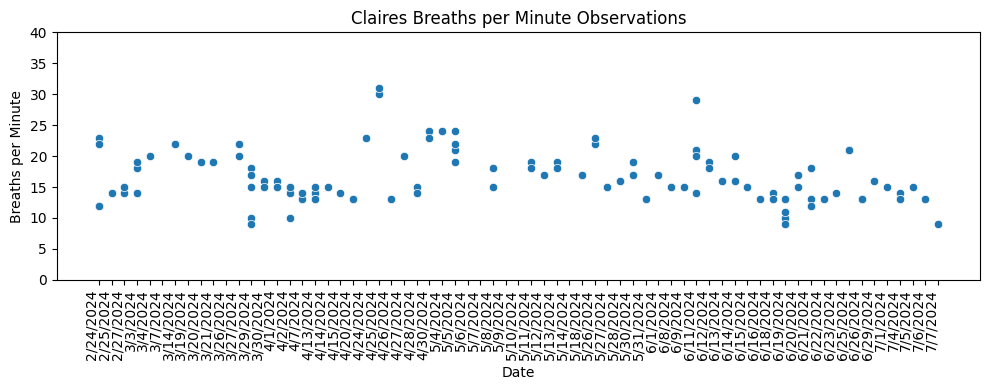

In [32]:
#Create an x date dataframe, y breaths per minute data frame. Combine both into the variable data. 
x = df['date']
y = df['breaths_per_minute']
data = pd.DataFrame({'Date': x, 'Breaths per Minute': y})

# Create scatter plot
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Date', y='Breaths per Minute', data=data)

# Format x-axis labels
plt.xticks(rotation=90, ha='right')
# Set y-axis range
plt.ylim(0, 40)

# Add title and labels
plt.title('Claires Breaths per Minute Observations')
plt.xlabel('Date')
plt.ylabel('Breaths per Minute')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Data Points')

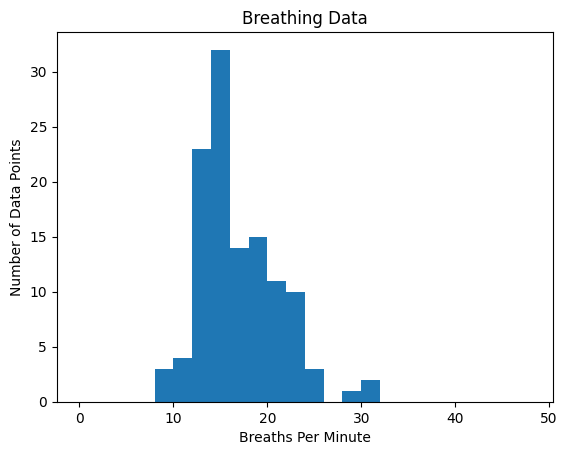

In [33]:
plt.hist(df['breaths_per_minute'], bins = range(0,50,2))
plt.title('Breathing Data')
plt.xlabel('Breaths Per Minute')
plt.ylabel('Number of Data Points')

In [34]:
#OLS Regression to determine if the furosemide_dose has a correlation with breaths per minute.
#P>|t| value should be greater than 0.05 to be significant. 
est = ols(formula="breaths_per_minute ~ furosemide_dose", data=df).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:     breaths_per_minute   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.138
Date:                Mon, 08 Jul 2024   Prob (F-statistic):              0.146
Time:                        21:51:17   Log-Likelihood:                -333.11
No. Observations:                 117   AIC:                             670.2
Df Residuals:                     115   BIC:                             675.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          19.5077      2.096     

In [35]:
print(df)

           date_time       date      time  breaths_per_minute  \
0    2/24/2024 15:50  2/24/2024     15:50                23.0   
1    2/24/2024 15:52  2/24/2024     15:52                22.0   
2    2/24/2024 21:34  2/24/2024     21:34                12.0   
3    2/24/2024 21:36  2/24/2024     21:36                12.0   
4    2/25/2024 13:13  2/25/2024     13:13                14.0   
..               ...        ...       ...                 ...   
126    7/4/2024 8:15   7/4/2024   8:15 AM                13.0   
127   7/4/2024 11:18   7/4/2024  11:18 AM                13.0   
128   7/5/2024 11:32   7/5/2024  11:32 AM                15.0   
129    7/6/2024 8:12   7/6/2024   8:12 AM                13.0   
130   7/7/2024 23:35   7/7/2024  11:35 PM                 9.0   

     furosemide_dose  vetmedin_dose  enalapril_dose  
0                0.7           1.25            1.25  
1                0.7           1.25            1.25  
2                0.7           1.25            1.25  
3  